In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
A = np.random.randint(10, size=(2,3,4,5)) # it chooses from the last and then assigns the dimensions
B = np.random.randint(10, size=(2,3))

In [6]:
A[0,1,2,3]

1

 # A random color image

In [7]:
img = np.random.randint(255, size=(4,4,3), dtype='uint8')

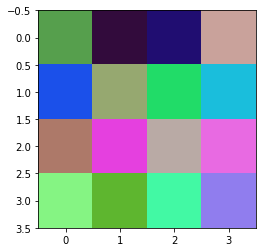

In [13]:
plt.imshow(img)

In [14]:
np.tensordot(A,B,axes=([0,1],[0,1]))

array([[ 84, 122,  70, 103,  54],
       [103,  92, 139, 133,  92],
       [ 69, 103,  79,  59, 109],
       [139, 101, 106, 151, 110]])

In [17]:
np.tensordot(A,B, axes=([0],[0])).shape

(3, 4, 5, 3)

In [18]:
A.shape

(2, 3, 4, 5)

In [19]:
B.shape

(2, 3)

In [20]:
# ALL NEEDED TO BE remembered is that we need to see how many are remaining as we reduce them by prod and usmming

# Image filters with convolutionals

In [58]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [59]:
img = misc.ascent()

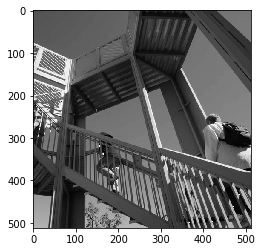

In [27]:
plt.imshow(img, cmap='gray')

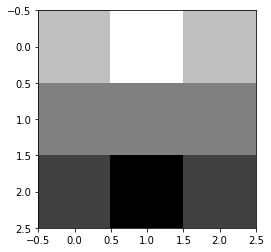

In [28]:
kernel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
plt.imshow(kernel, cmap='gray')

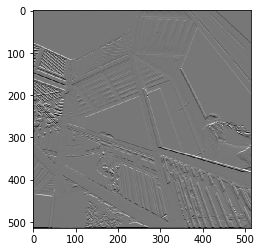

In [30]:
# horizontal lines highlight
# in CNN the kernel it self finds the filter to convolve

res = convolve2d(img, kernel)
plt.imshow(res,cmap='gray')

In [35]:
from keras.layers import Conv2D
from keras import Sequential

In [33]:
img.shape

(512, 512)

In [60]:
img_tensor = img.reshape(1,512,512,1)

In [52]:
'''2D convolution'''

model = Sequential()
model.add(Conv2D(1,(3,3),  input_shape=(512,512,1), padding='same')) #strides -> 2 ie.e divided by 2, and reduced by 1 
model.compile('adam', 'mse')

In [53]:
pred = model.predict(img_tensor)
pred.shape

(1, 512, 512, 1)

In [48]:
pred = pred[0,:,:,0]

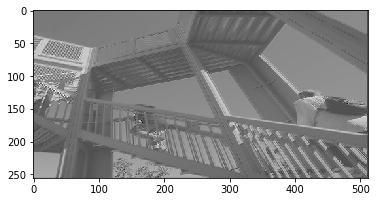

In [49]:
plt.imshow(pred, cmap='gray')

In [40]:
weights = model.get_weights()

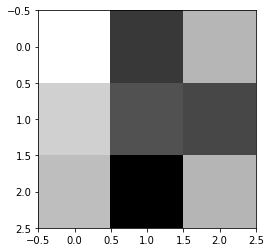

In [41]:
plt.imshow(weights[0][:,:,0,0], cmap='gray')

In [ ]:
weights[0] = np.ones(weights[0].shape)
model.set_weights(weights)
pred = model.predict(img_tensor)
pred = pred[0,:,:0]
plt.imshow(pred, cmap='gray')

# POOLING

In [54]:
from keras.layers import MaxPool2D, AvgPool2D

In [64]:
'''Max pooling'''

model = Sequential()
model.add(MaxPool2D((5,5), input_shape=(512,512,1)))
model.compile('adam', 'mse')

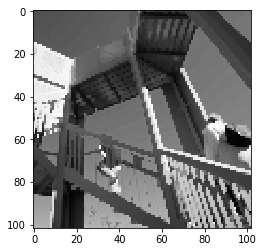

In [66]:
pred = model.predict(img_tensor)[0,:,:,0]
plt.imshow(pred, cmap='gray')

In [67]:
'''Avg pooling'''

# the image is quite sommthened as we are averaging the pixel values
model = Sequential()
model.add(AvgPool2D((5,5), input_shape=(512,512,1)))
model.compile('adam', 'mse')

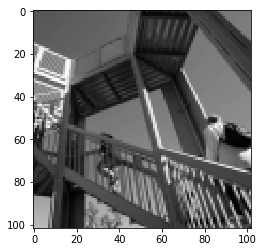

In [68]:
pred = model.predict(img_tensor)[0,:,:,0]
plt.imshow(pred, cmap='gray')